In [75]:
from ndslib.config import jupyter_startup
jupyter_startup()

# Import libraries 
from ndslib.viz import imshow_with_annot
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Sample data
homework1 = np.array([[1.2, 3.1, 0], [2.4, 1.8, 1], [0.8, 2.9, 0], [3.3, 3.7, 1], [1.5, 2.2, 0], [2.7, 4.1, 1]])
x1 = homework1[:,0]
x2 = homework1[:,1]
y = np.array(homework1[:,2])


# Shape data
x = np.concatenate((np.ones((y.shape[0],1)), x1.reshape(-1,1), x2.reshape(-1,1)), axis=1)
y = y.reshape(-1,1)


# Calculate OLS
x_t = x.T
x_tx = np.dot(x_t, x)
x_tx_inv = np.linalg.inv(x_tx)
beta = np.dot(np.dot(x_tx_inv, x_t),y)

In [74]:
# Calculate MSE and R squared
sum_res = 0 
sum_tot = 0
y_mean = np.mean(y)

for i in range(len(y)):
    y_pred = beta[0,0] + beta[1,0]*x1[i]  + beta[2,0] * x2[i]
    y_obs = y[i]
    residual = y_obs - y_pred
    sum_res += residual ** 2
    sum_tot += (y_obs - y_mean) ** 2

mse = sum_res / len(y)
r_squared = 1 - (sum_res / sum_tot)

print("MSE:", mse)
print("R-squared:", r_squared)


MSE: [0.03439374]
R-squared: [0.86242504]


In [ ]:
'''
Explain why or why not linear regression might be suitable for predicting y in this case. 
There are multiple reasons by linear regression may not be appropriate for predicting y. 

First of all, it is the class of value that y is. 
Y consists of discrete values 0 and 1, which could make it either an integer or boolean. 
Linear regression is meant to predict continuous variables. 

Second of all, it relates to the distribution of values. 
When visualizing the distribution of the observed features and output variable y, they do not clearly fit a linear distribution. 
Some of this is related to the limited set of values where it may be difficult to infer what relation exists. 
It is possible an outlier value is exerting significant effects on the model. 

Thirdly, the two features do not seem entirely independent. At high values of one, there are generally high values of the other, and vice versa. 
It is difficult to make a more sophisticated inference given the limited set of values. 

Fourthly, with such a small data set, there may be issues in terms of the quality of the model. 
It may be difficult to generalize from this limited set of data. 
The coefficients may be highly unstable with the addition of more values. 
'''


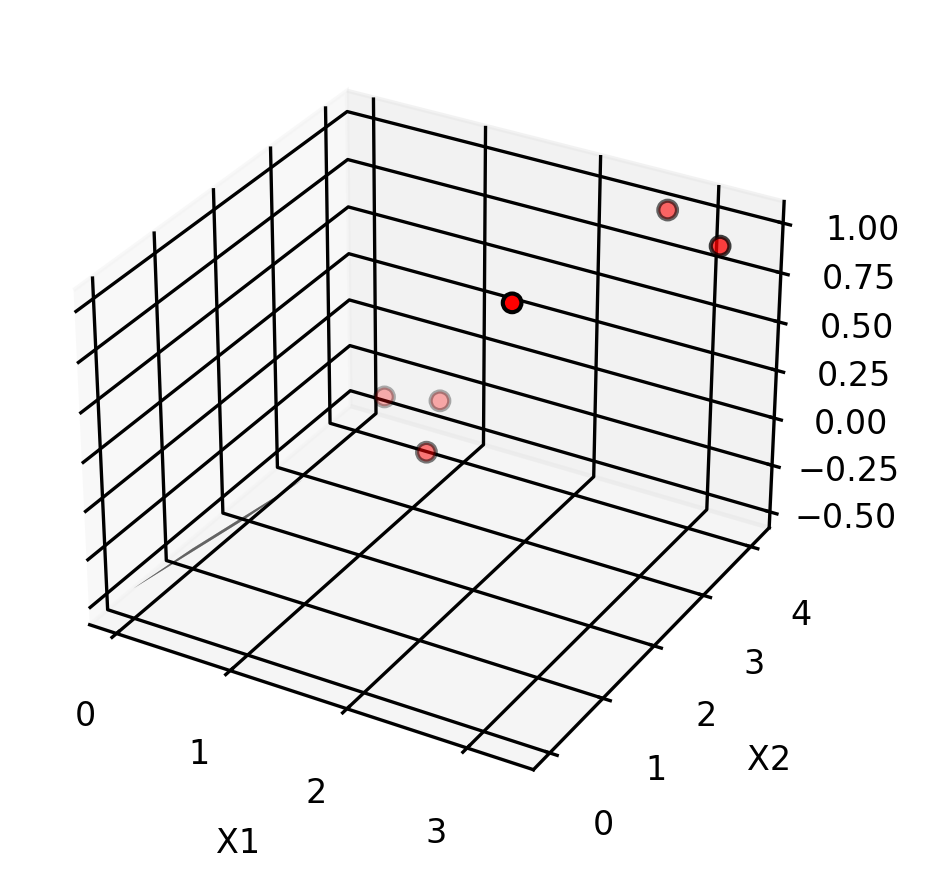

In [80]:
#----------------------------------------------------
# Visualize regression solution
# This was just to see what happens -- 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1, x2, y, c='r', marker='o')

xx, yy = np.meshgrid(np.linspace(0, 1, 10), np.linspace(0, 1, 10))
zz = beta[0,0] + beta[1,0]* xx + beta[2,0] * yy


# Plot the plane
ax.plot_surface(xx, yy, zz, alpha=0.8)


# Set labels
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')


# Show the plot
plt.show()